In [2]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [3]:
path = '/Users/jeremyc/Desktop/Astro361/Lab6/lab6_data/' #path to data
biases = [] #bias

for i in range(23,33):  #reads all bias frames
    biases.append(fits.getdata(path+'nov_7Bias'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0) #average bias frame  

In [4]:
lamp_on_neon  = [] #neon lamp
lamp_on_helium = [] #helium lamp
lamp_bg = [] #lamp background
sun_on  = [] #solar spectrum from observation
sun_bg = [] #solar spectrum background

#reads all observations, source and background
for i in range(35,37):
    zeros = (8-len(str(i)))*'0'
    lamp_on_neon.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int))
    
for i in range(33,35):
    zeros = (8-len(str(i)))*'0'
    lamp_on_helium.append(fits.getdata(path+'nov_7'+"0"*(8-len(str(i)))+str(i) +'.fit', ext=0).astype(np.int)) 

for i in range(37,39):
    zeros = (8-len(str(i)))*'0'
    lamp_bg.append(fits.getdata(path+'nov_7'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(42,45):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'nov_7'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(39,42):
    zeros = (8-len(str(i)))*'0'
    sun_bg.append(fits.getdata(path+'nov_7'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

In [5]:
#subtract all frames with the average bias frame
lamp_on_sub_bias_neon = [lamp - avg_bias for lamp in lamp_on_neon] 
lamp_on_sub_bias_helium = [lamp - avg_bias for lamp in lamp_on_helium] 
lamp_bg_sub_bias = [lamp - avg_bias for lamp in lamp_bg]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_bg_sub_bias = [sun - avg_bias for sun in sun_bg]

#calculate the average adjusted background frame (no bias)
avg_lamp_bg = np.asarray(lamp_bg_sub_bias).mean(axis=0)
avg_sun_bg = np.asarray(sun_bg_sub_bias).mean(axis=0)

In [6]:
#subtract lamp and solar frame with the average adjusted background frames from above
lamp_corrected_neon = [lamp_on - avg_lamp_bg for lamp_on in lamp_on_sub_bias_neon]
lamp_corrected_helium = [lamp_on - avg_lamp_bg for lamp_on in lamp_on_sub_bias_helium]
sun_corrected = [sun_on - avg_sun_bg for sun_on in sun_on_sub_bias]

#take the average of the above "clean" frames
avg_lamp_neon = np.asarray(lamp_corrected_neon).mean(axis=0)
avg_lamp_helium = np.asarray(lamp_corrected_helium).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

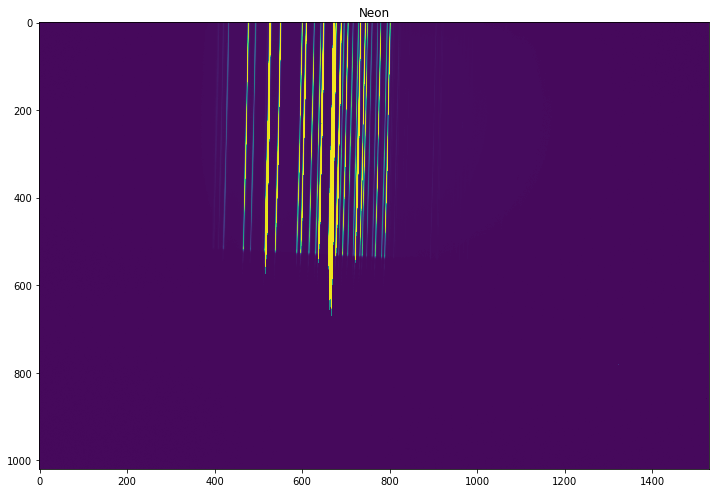

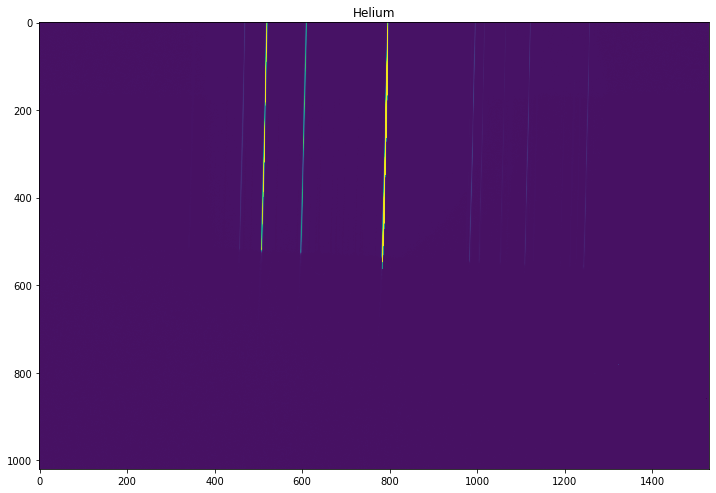

In [7]:
#plotting the clean frames in (x,y) pixel coordinates, each with a count value
plt.imshow(avg_lamp_neon) 
plt.title('Neon')
plt.savefig('Neon Calibration')
plt.show()
#this is for the neon lamp

plt.imshow(avg_lamp_helium) 
plt.title('Helium')
plt.show()
#this is for the helium lamp

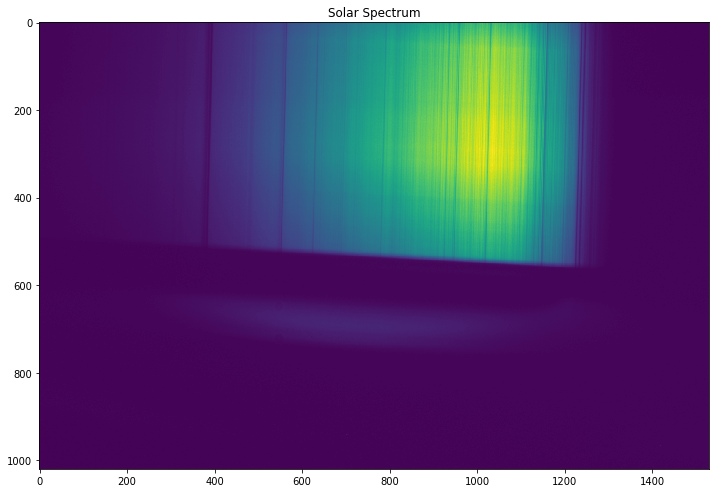

In [8]:
#plot solar spectrum in (x,y) pixel coordinates, each with a count value
plt.imshow(avg_sun)
plt.title('Solar Spectrum')
plt.savefig('Solar Spectrum not calibrated')
plt.show()

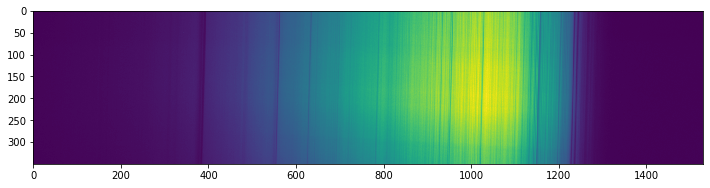

In [9]:
#select region to look at: 100-450 was chosen where there spectral lines are present
plt.imshow(avg_sun[100:450,:])

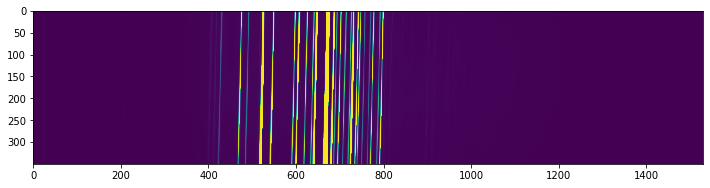

In [10]:
#select region to look at: 100-450 was chosen where there spectral lines are present
plt.imshow(avg_lamp_neon[100:450,:])

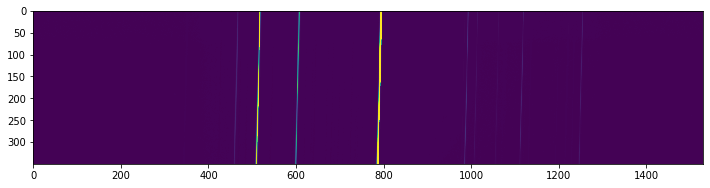

In [11]:
#select region to look at: 100-450 was chosen where there spectral lines are present
plt.imshow(avg_lamp_helium[100:450,:])

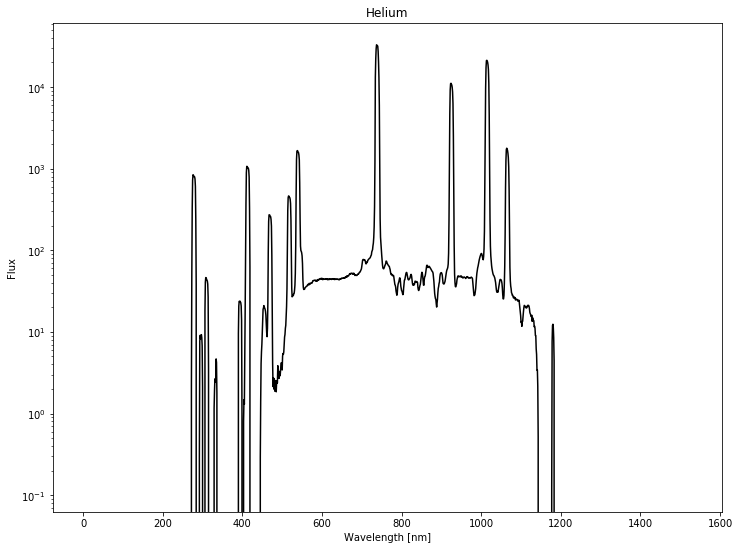

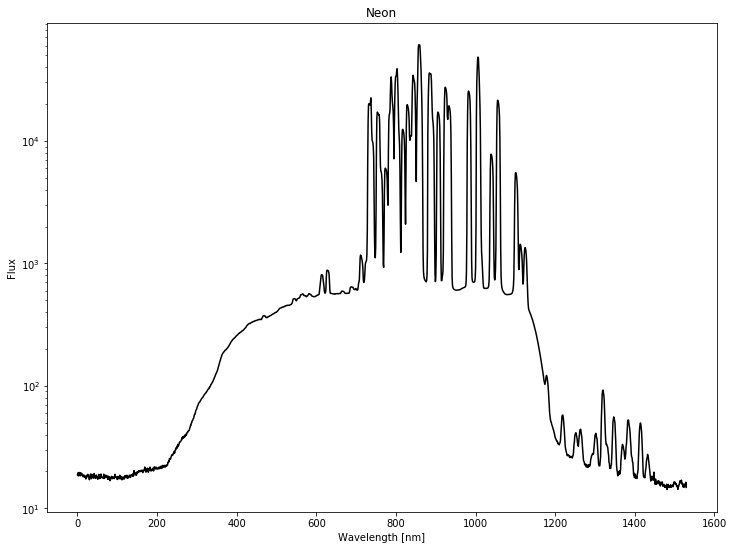

In [12]:
lamp_good_helium = np.asarray(avg_lamp_helium[100:450,:]).mean(axis=0) #average the columns
lamp_good_neon = np.asarray(avg_lamp_neon[100:450,:]).mean(axis=0) #average the columns
sun_good  = np.asarray(avg_sun[100:450,:]).mean(axis=0) #average the columns

#plot count vs flipped pixel dimension for both lamps (flip because increasing wavelength was to the left)
plt.plot(np.flip(np.arange(len(lamp_good_helium)),0), lamp_good_helium, 'k-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.title('Helium')
plt.yscale('log')
plt.savefig('Helium not calibrated')
plt.show()

plt.plot(np.flip(np.arange(len(lamp_good_neon)),0), lamp_good_neon, 'k-') 
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Neon')
plt.savefig('Neon not calibrated')
plt.show()

#x-axis is not really wavelength, as calibration is needed

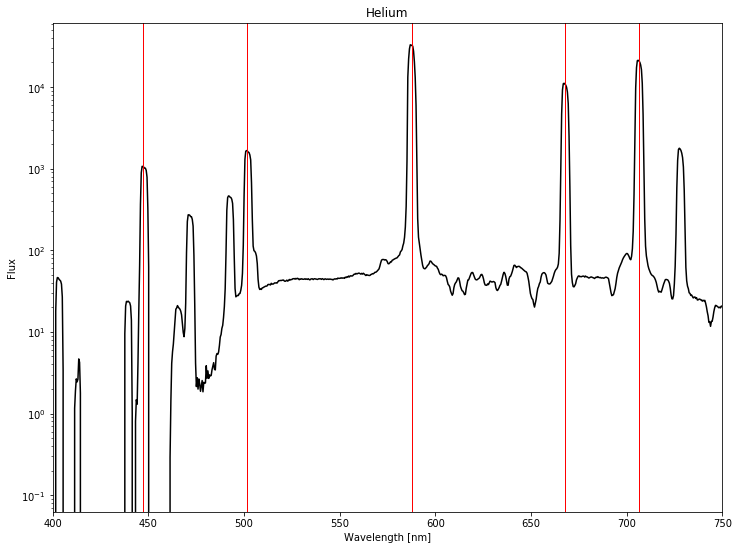

In [13]:
#wavelength of helium emission lines in nm
helium_lines = [447.148,501.568,587.562,667.815,706.519]

#change stretch and shift until emission lines match with spectrum
stretch = 0.43
shift = -270

#once stretch and shift parameters are determined, scale wavelength axis
plt.plot(np.flip(np.arange(len(lamp_good_helium)),0)*stretch-shift, lamp_good_helium, 'k-') 
for line in helium_lines:
    plt.axvline(line,color='r',linewidth = 1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Helium')
plt.xlim(400,750)
plt.savefig('Helium calibrated')
plt.show()

#now this is the corrected helium spectrum

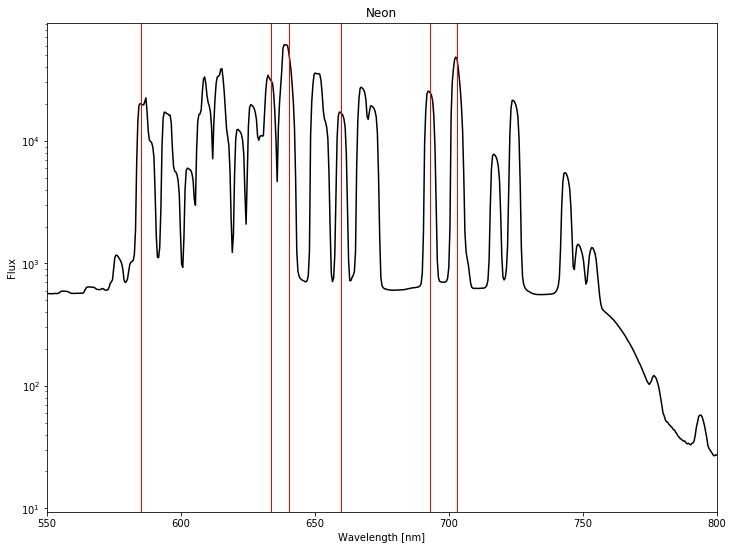

In [14]:
#wavelength of neon emission lines in nm
neon_lines = [585.249,633.443,640.225,659.895,692.947,703.241]

#using same stretch and shift parameters,scale wavelength axis for correct neon spectrum
plt.plot(np.flip(np.arange(len(lamp_good_neon)),0)*stretch-shift, lamp_good_neon, 'k-')
for line in neon_lines:
    plt.axvline(line,color='r',linewidth = 1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Neon')
plt.xlim(550,800)
plt.savefig('Neon calibrated')
plt.show()

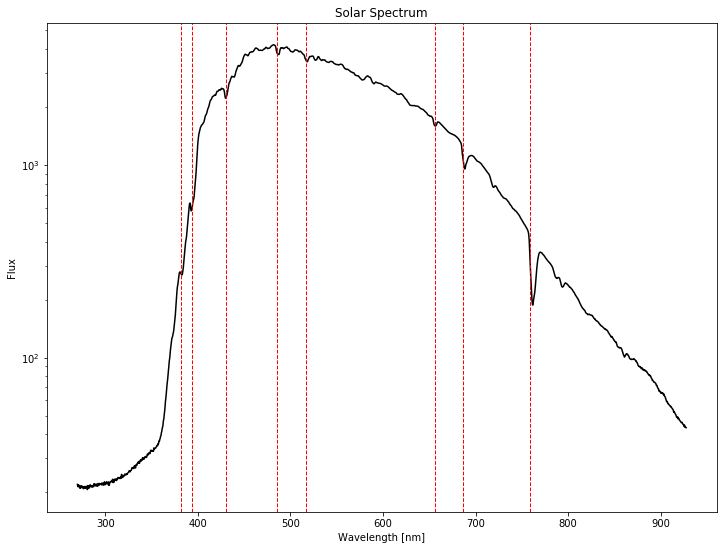

In [15]:
#known absorption wavelengths in sun
fraunhoffer_lines = [382.044,393.366,430.790,486.134,516.891,656.281,686.719,759.370]

#wavelengths correspond to names L,K,G,Hbeta,b,Halpha,B,A in respective order

#plot spectrum with correction parameters and absorption lines
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.yscale('log')
plt.title('Solar Spectrum')
plt.plot(np.flip(np.arange(len(sun_good)),0)*stretch-shift, sun_good, 'k-')
for line in fraunhoffer_lines:
    plt.axvline(line,color='r',linestyle='dashed',linewidth = 1)
plt.savefig('Calibrated and marked solar spectrum')
plt.show()